# International Suicide Rates 1985-2016: Exploratory Data Analysis

### Author: Danny Witt

## Description of dataset:

The data have been collected from a Kaggle dataset (https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016#master.csv). The data include socio-economic data for individuals who completed suicide in various countries between 1985 to 2016. As I was not involved in collection or curation, I cannot attest to the validity of the underlying data, but will proceed to use the dataset for exploratory data analysis purposes. 

In the U.S., rates of suicide have been increasing in nearly every state, according to the most recent Vital Signs report by the Centers for Disease Control and Prevention (CDC). It states that "in 2016, nearly 45,000 Americans age 10 or older died by suicide...which is the 10th leading cause of death and is one of just three leading causes that are on the rise" (https://www.cdc.gov/nchs/pressroom/sosmap/suicide-mortality/suicide.htm). 

While the phenomenon of suicide has a causal connection to psychiatric disorders that precipitate suicidal ideation, it is also worth exploring relationships between suicide rates across different socioeconomic and geographic regions (including similarities and contrasts between the U.S. and other countries). Statistically signficant relationships that emerge could guide clinical practice, community awareness and preventive efforts, and ultimately help shape health policy at the federal, state, and local levels of government. 

The dataset includes the following variables: country, year, sex, age, suicides_no, population, suicides/100k pop, country-year, HDI for year, gdp_for_year, gdp_per_capita, and generation.


## Exploratory Data Analysis

In [32]:
#Load required Python packages into local environment

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

In [33]:
#Read in the file to construct a Pandas dataframe:

suicide_df = pd.read_csv('/Users/dannywitt/Desktop/IDS_705_ML/Homework/ids705/assignments/suicide_data.csv')
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [34]:
#Describe the summary statistics of the dataset:
suicide_df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [35]:
#Describe the different data types of the variables in the dataset:
print(suicide_df.dtypes)

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object


In [36]:
#Check to see if any missing values (NaN):
print('Are there any missing values?: {}'.format(suicide_df.isnull().values.any()))
print('')

#How many values are missing values? And, where are these missing values located 
#(i.e., how are they distributed across variables)?
print(suicide_df.isnull().sum())

Are there any missing values?: True

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


In [37]:
#Since there are many missing in one variable, I'm going to remove variable named "HDI for year" due to 
#large number of missing values:
suicide_df_v2 = suicide_df.drop(columns=['HDI for year'])

#Analyze how many unique values exist in the categorical variables:
category_var = ['country','year','sex','age','generation']
suicide_df_v2[category_var].nunique()

country       101
year           32
sex             2
age             6
generation      6
dtype: int64

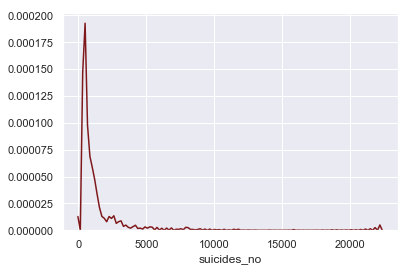

In [38]:
# Check the distribution of target variable 'suicides_no'

# Plot 1 - Distribution of the target variable
sns.distplot(suicide_df_v2['suicides_no'], color='#7f181b', kde=True, hist=False) ;


In [39]:
# Analysis of top 10 country with highest median suicide numbers

# I decided to do a median value because the distribution (as seen above) is skewed to the right
df_v3 = suicide_df_v2.groupby(by=['country']).median()[['suicides_no','population','gdp_per_capita ($)']].sort_values('suicides_no',ascending=False).reset_index()
cat = list(df_v3.head(10)['country'])
print('Top 10 country with highest suicide median ')
print(df_v3.head(10))

Top 10 country with highest suicide median 
              country  suicides_no  population  gdp_per_capita ($)
0       United States       2193.0  20375469.0             39218.0
1               Japan       1641.0   8469400.0             37534.0
2  Russian Federation       1526.5  10831484.5              3773.0
3             Germany        759.0   4922470.5             32783.5
4              France        715.0   4043654.0             27154.0
5             Ukraine        517.5   3627497.5              1548.0
6   Republic of Korea        464.0   3692814.5             13217.0
7              Brazil        348.0  14785174.5              4490.0
8               Italy        278.5   4099412.0             23342.0
9              Poland        261.0   2932915.5              6498.5


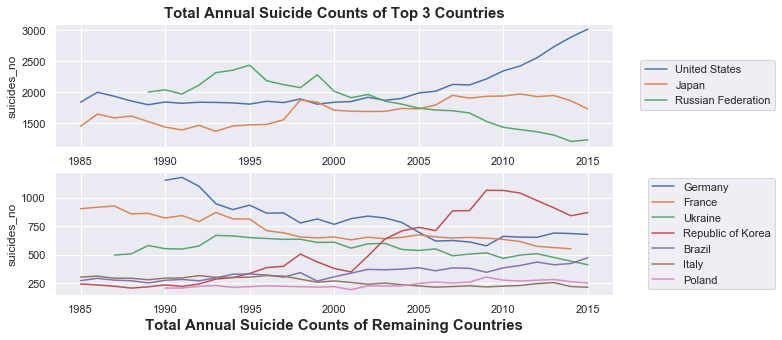

In [40]:
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt

# I'm interested in understanding how the top 10 countries' (based on number of suicides) suicide rates
#have changed year by year from 1985-2016.

df_v4 = suicide_df_v2.groupby(by=['country','year']).median()['suicides_no'].reset_index()
matplotlib.rcParams['figure.figsize'] = [10,5]
gs = matplotlib.gridspec.GridSpec(2,1)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[1,0])

# Plot 2: Number of suicides committed in top 3 highest rate countries:
for i in cat[:3] :
    sns.lineplot(data=df_v4[df_v4['country']==i], x='year', y='suicides_no', ax=ax1) ;
    
ax1.legend(cat[:3], loc=7,  bbox_to_anchor=(1.3, 0.5)) ;
ax1.set_title('Total Annual Suicide Counts of Top 3 Countries', size=15, fontweight='bold') ;

# Plot 3: Line plot depicting change in total suicides/yr by other countries
for i in cat[3:] :
    sns.lineplot(data=df_v4[df_v4['country']==i], x='year', y='suicides_no', ax=ax2) ;
    
ax2.legend(cat[3:], loc=7,  bbox_to_anchor=(1.3, 0.5)) ;
ax2.set_xlabel('Total Annual Suicide Counts of Remaining Countries', size=15, fontweight='bold') ;

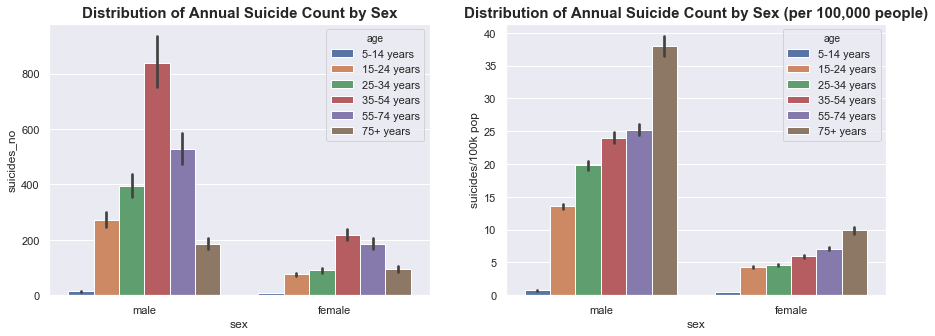

In [41]:
# Visualize the distribution of suicide numbers across (1) gender/sex and (2) age:
matplotlib.rcParams['figure.figsize'] = [15,5]
gs = matplotlib.gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

# Plot 4: Distribution of suicide count by sex
sns.barplot(data=suicide_df_v2, x='sex', y='suicides_no', hue='age', ax=ax1
           ,hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']) ;
ax1.set_title('Distribution of Annual Suicide Count by Sex', size=15, fontweight='bold') ;

# Plot 5: 
sns.barplot(data=suicide_df_v2, x='sex', y='suicides/100k pop', hue='age', ax=ax2
           ,hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']) ;
ax2.set_title('Distribution of Annual Suicide Count by Sex (per 100,000 people)', size=15, fontweight='bold') ;


In [42]:
# Make new variable 'continent_new' that identifies the continent for each country where a suicide occurred:

country = suicide_df_v2['country'].unique()
new_val = ['Europe','Central America','South America','Asia','Central America'
          ,'Australia','Europe','Asia','Central America','Asia'
          ,'Central America','Europe','Europe','Central America'
          ,'Europe','South America','Europe','Africa'
          ,'North America','South America','South America','Central America','Europe','Central America'
          ,'Asia','Europe','Europe','Central America','South America'
          ,'Central America','Europe','Oceania','Europe','Europe','Asia'
          ,'Europe','Europe','Central America','Central America','South America','Europe'
          ,'Europe','Europe','Asia','Europe','Central America','Asia'
          ,'Asia','Oceania','Asia','Asia','Europe'
          ,'Europe','Europe','Asia','Asia','Europe'
          ,'Africa','North America','Asia','Europe','Europe'
          ,'Oceania','Central America','Europe','Asia','Central America','South America'
          ,'Asia','Europe','Europe','Central America','Asia'
          ,'Asia','Europe','Europe'
          ,'Central America','Central America'
          ,'Central America','Europe','Europe'
          ,'Africa','Asia','Europe','Europe','Africa'
          ,'Europe','Asia','South America','Europe','Europe'
          ,'Asia','Central America','Asia','Asia'
          ,'Europe','Asia','Europe'
          ,'North America','South America','Asia']
new_var = []

for i in range(len(country)) :
    n = len(suicide_df_v2[suicide_df_v2['country']==country[i]])
    for j in range(n) :
        new_var.append(new_val[i])
        
suicide_df_v2['continent_new'] = new_var

In [43]:
# Count how many country in each continent recorded in the dataset:
continent = list(suicide_df_v2['continent_new'].unique())
new_val = pd.Series(new_val)
count = []

print('Count of country in each continent recorded in the dataset:')
for i in continent :
    n = len(new_val[new_val==i])
    count.append(n)
    print(i,':',n)

Count of country in each continent recorded in the dataset:
Europe : 38
Central America : 19
South America : 9
Asia : 24
Australia : 1
Africa : 4
North America : 3
Oceania : 3


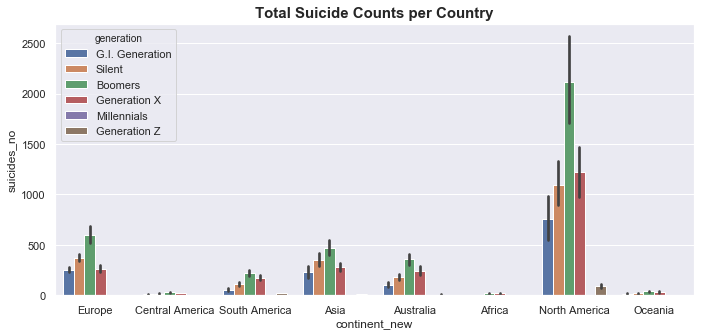

In [46]:
# Check the effect of variable 'generation'
matplotlib.rcParams['figure.figsize'] = [16,5]
gs = matplotlib.gridspec.GridSpec(1,3, width_ratios=[60,8,6])
ax1 = plt.subplot(gs[0,0])

# Plot 6 - Total suicide counts per country:
sns.barplot(data=suicide_df_v2[suicide_df_v2['continent_new'].isin(['North America',
                                                                'Europe',
                                                                'South America',
                                                                'Asia',
                                                                'Australia',
                                                                'Central America',
                                                                'Oceania',
                                                                'Africa'])], x='continent_new', y='suicides_no', ax=ax1
           ,hue_order=['G.I. Generation','Silent','Boomers','Generation X','Millennials','Generation Z'], hue='generation',) ;
ax1.set_title('Total Suicide Counts per Country', size=15, fontweight='bold') ;



## Summary and Future Directions:

On initial investigation, there was a range in annual suicides per country between 0 to approximately 27,000 deaths. It is unclear if data are missing and it is unlikely that no suicides occurred in any given country, given other international epidemiology studies citing the mental health phenomenon. Thus, I would be cautious about drawing conclusions with regard to every country's suicide rates. However, there was a large sample of data reported for the U.S. so I proceeded to do exploratory data analysis.

This dataset included 101 unique countries, 32 different years, 2 sex identifiers, 6 age groups, and 6 generational cohort labels. The highest annual suicide counts occurred in the U.S., Russia, and Japan. However, since 1985, the annual death totals in Russia have decreased and stayed relatively similar for Japan; in the U.S., the annual suicide deaths has increased continuously from 1985-2016. Other countries saw a decrease in suicide deaths between 1985-2016, except for South Korea, which had an increase in suicide deaths particularly increasing after the year 2000.

Death from suicide was higher in males than females, which conforms with epidemiological studies which suggest that while women might attempt suicide at higher rates, males complete suicide at higher rates. The highest rates of suicide (adjusted for share of population) were the 75+ age group in both males and females, while the highest total annual deaths occurred in the 35-54 year old cohorts in both males and females. 

Finally, I compared annual suicide death counts across different continents (by grouping the countries respectively) and observed higher annual suicide deaths in North America compared to other continents. However, it is unclear how accurate and valid data collection were across all listed countries and continents. The "Baby Boomer" generation showed the highest death counts from suicide across all continents, and this seems to relate to previous findings that the 35-54 y.o and 75+ age groups had the highest annual suicide counts. 

These are the initial interpretations of the data, however future data analysis is warranted to better understand other socio-economic factors that may relate to suicide rates in various countries. 
